In [37]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

the mdata dataframe was created with the functions found in the backend repository and saved in csv file. This dataframe contains the data our model was trained with.

In [24]:
mdata = pd.read_csv("mdata.csv")
print(mdata)

                    time        api_called_at  temperature_2m  \
0    2023-06-09 17:00:00  2023-06-09 16:30:00            23.7   
1    2023-06-09 18:00:00  2023-06-09 16:30:00            22.8   
2    2023-06-09 19:00:00  2023-06-09 16:30:00            22.0   
3    2023-06-09 20:00:00  2023-06-09 16:30:00            21.1   
4    2023-06-09 21:00:00  2023-06-09 16:30:00            20.1   
..                   ...                  ...             ...   
175  2023-06-25 16:00:00  2023-06-24 15:30:00            35.7   
176  2023-06-25 17:00:00  2023-06-24 15:30:00            35.8   
177  2023-06-25 18:00:00  2023-06-24 15:30:00            35.6   
178  2023-06-25 19:00:00  2023-06-24 15:30:00            35.0   
179  2023-06-25 20:00:00  2023-06-24 15:30:00            33.3   

     relativehumidity_2m  surface_pressure  windspeed_10m  windspeed_80m  \
0                   50.0            1008.8           18.0           28.3   
1                   53.0            1008.9           16.9          

/var/folders/3w/rk_hrv3x4414ly__vz04n7vr0000gn/T/ipykernel_6346/470150746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = mdata.corr()


                                  temperature_2m  relativehumidity_2m  \
temperature_2m                          1.000000            -0.868802   
relativehumidity_2m                    -0.868802             1.000000   
surface_pressure                       -0.542161             0.362998   
windspeed_10m                           0.582214            -0.690347   
windspeed_80m                           0.267854            -0.438942   
windspeed_120m                          0.140550            -0.333747   
windspeed_180m                         -0.001552            -0.210714   
winddirection_10m                       0.565871            -0.340244   
winddirection_80m                       0.565565            -0.327626   
winddirection_120m                      0.548271            -0.306295   
winddirection_180m                      0.505748            -0.261574   
direct_normal_irradiance                0.699316            -0.713540   
direct_normal_irradiance_instant        0.627269   

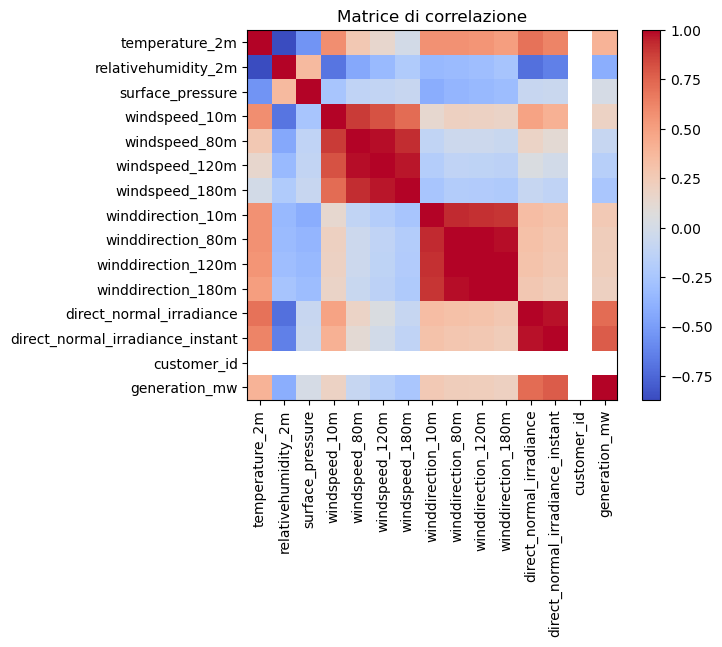

In [33]:
corr_matrix = mdata.corr()
print(corr_matrix)
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation matrix')
plt.savefig('corr.png', dpi=300)
plt.show()

In [29]:
model = pickle.load(open("trained_model.pickle", "rb"))
coefficients = model.coef_
intercept = model.intercept_
print(f"model coefficient :{coefficients}")
print(f"model intercept :{intercept}")

model coefficient :[[0.07557565]]
model intercept :[-0.59737111]


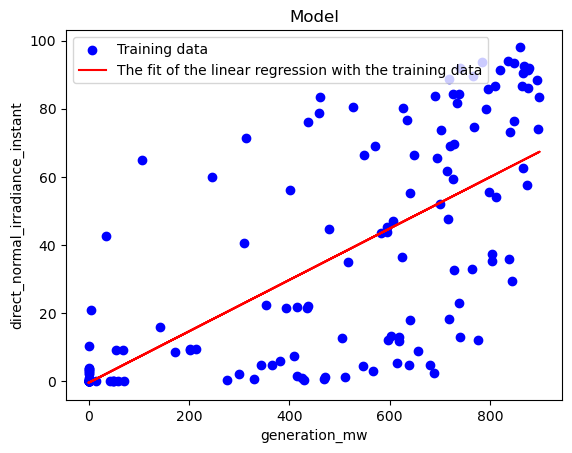

In [35]:
x = mdata["direct_normal_irradiance_instant"].to_numpy().reshape(-1,1)
y = mdata['generation_mw']
pred = model.predict(x)
plt.scatter(x, y, color='blue', label='Training data')
plt.plot(x, pred, color='red', label='The fit of the linear regression with the training data')
plt.xlabel('generation_mw')
plt.ylabel('direct_normal_irradiance_instant')
plt.title('Model')
plt.legend()
plt.savefig('lr.png', dpi=300)
plt.show()

In [40]:
xp = x
xp = sm.add_constant(xp)
model_sm = sm.OLS(y, xp)
results = model_sm.fit()
p_values = results.pvalues
print(p_values)

const    8.734193e-01
x1       3.481373e-37
dtype: float64


-The p-value for the const variable is 8.734193e-01. This very high value indicates that the model intercept (constant) is not statistically significant. In other words, you don't have enough evidence to argue that the intercept is non-zero.

-The p-value for the variable x1 is 3.481373e-37, a very small value. This indicates that the variable x1 is statistically significant in the linear regression model. You have very strong evidence to say that the x1 variable has a significant effect on the dependent variable.